# Lab 4: Logistic Regression (continuation) 

In this practice session, you will work on "Titanic" database example (from the website [http://www.data-mania.com/](http://www.data-mania.com/)). This database contains different information about passengers of the sunk "RMS Titanic" ocean liner. The goal is to build classifier that predict if a passenger has survived or not the catastrophe based on the passenger age, sex, ticket fare ...

The "Titanic database lack some information of some passengers. In the other hand, it has some unusable information for survivability prediction like ticket or cabin number. Hence, in the first part you are invited to process the training data by removing unnecessary information and filling the missing data.

In the second part, you should train a logistic classifier using [**sklearn**](http://scikit-learn.org/stable/) library. Then, you could assess its accuracy with some [**metrics**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) of sklearn. 

### Load and process dataset
In this session, we will use new library for data structure and plotting. The [**pandas**](http://pandas.pydata.org/pandas-docs/stable/) library offer the possibility to store data in [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) structure which is similar to classic 2-D array but it has labels for rows and columns and we can use these labels to index a specific component in the dataframe.  
The [**seaborn**](https://seaborn.pydata.org/index.html) library helps us to generate meaningful statistical graphics by extending functionalities in matplotlib library.

<font color="blue">**Question 1: **</font>
- Load data from the given "url" in "titanic" variable and explore it (what are attributes/size...?).  
**Hint:** You could use [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function from pandas library.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# load titanic dataset using the url below
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

# explore data
print("The size of titanic dataset is: ",titanic.shape)
print("Features name are: ",titanic.columns)

print("\nSome information about the dataset:")
titanic.info()
print("\nHow dataset looks like:")
titanic.head()


The size of titanic dataset is:  (891, 12)
Features name are:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Some information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

How dataset looks like:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color="Green"><u>_**Comment:**_</u></font>
- The "Survived" column represent the target to predict. While other columns represent features or regressors used for target prediction.

<font color="blue">**Question 2: **</font>
- What is the number of samples (passengers) in each class (y=1:survived, y=0:did not survive).  
**Hint:** You could index dataframe with boolean condition on "Survived" column. You could also use "[where](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)" function from pandas library.

In [2]:
# determine the number of survived/not survived to understand more dataset characteristics 
nbr_surviv = titanic.where(titanic['Survived']==1).notnull()['Survived'].sum()  # you could also use: len(titanic[titanic['Survived']==1])
nbr_died = len(titanic[titanic['Survived']==0])  # you could also use: titanic.where(titanic['Survived']==0).notnull()['Survived'].sum()

print("The number of survived passenger in titanic dataset is: ",nbr_surviv)
print("The number of died passenger in titanic dataset is: ",nbr_died)


The number of survived passenger in titanic dataset is:  342
The number of died passenger in titanic dataset is:  549


<font color="Green"><u>_**Observation:**_</u></font>
- The number of "Survived" and "Not survived" passengers is comparable. Then,the ratio of "Survived" and "Not survived" in the dataset have no huge difference. We could say that the data is not skewed and we may use the accuracy measure to assess the performance of our classifier (see more about accuracy and skewed data in question 5).

#### Remove not significant features
Some features in the "titanic" dataset are meaningless and they doesn't help to predict survivability. Thus, we should remove them.

<font color="blue">**Question 3: **</font>
- The "Name" and "cabin" number are two meaningless features and  there are two other features try to guess them. Then, remove all these 4 features from "titanic" dataframe.  
**Hint:** You could use "[drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)" function from pandas library.

In [3]:
# remove non relevant features
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<font color="Green"><u>_**Observation:**_</u></font>
- Beside "Name" and "Cabin" number, the "PassengerId" and "Ticket" number are meaningless features that doesn't help to predict survivability.

#### Deal with missing values
We note from the printed information about our dataset (with the command titanic.info()), that the "Age", "Cabin" and "Embarked" features have some missing values for some passengers. 

First, we will try to estimate missing "Age" from the passenger class "Pclass". If, we calculate the mean age of each class, we note that the 1st class passengers tend to be older than 3rd class manager. Hence, you should fill missing age values with the mean age of the corresponding passenger class.

/home/sbenamor/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


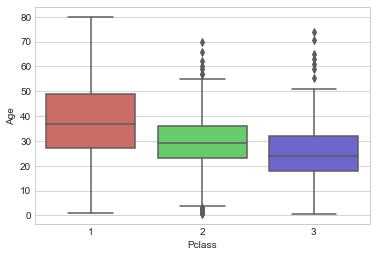

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [4]:
%matplotlib inline

# visualize Age box plot for each passenger class
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')
plt.show()

# calculate mean "Age" per "Pclass"
titanic.groupby('Pclass').mean()


<font color="Green"><u>_**Observations:**_</u></font>
- We note from the box plot that the mean "Age" per passenger "Pclass" decrease when moving from 1st class to 3 rd class. In addition, the 1st and 3rd quartiles are close to the mean which means majority of values are concentrated around the mean. Hence, we can estimate the passenger "Age" using the mean of each "Pclass".

<font color="blue">**Question 4: **</font>
- Fill the "approx_age" list with the estimated age from the previous means table. Put the estimated age for 1st class in the beginning of the list and for 3rd class at the end. 

In [5]:
# estimate missing Age
approx_age=[38,29,25]

# replace null value by estimated "Age"
null_age_idx=pd.isnull(titanic.Age)    # you could also use:  null_age_idx=pd.isnull(titanic['Age'])
titanic.loc[null_age_idx,'Age']=[approx_age[i-1] for i in titanic.loc[null_age_idx,'Pclass']]

# verify the remaining number of missing value
print("The number of missing value per feature:\n",titanic.isnull().sum())

The number of missing value per feature:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


- We note that there is two passengers that we don't know their embarking port. We could discard this two samples by dropping them.  
**Hint:** We could use "[dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)" function from pandas library.

In [6]:
titanic=titanic.dropna()
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Insert dummies variable
In the "titanic" dataset contains some qualitative features like "Sex" and "Embarked" port. In order to make the  useful in our computational model we should encode them with a numeric way with introducing order between "Embarked" categories for instance.  

In our case, we will use dummies variable method which consist on creating new boolean variable for each categories and encode each categories with "True" on the corresponding dummy variable.

In [7]:
# create "sex" dummy variable
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
print("Remplacement 'Sex' dummy variable:\n",sex.head())

# create "embark_port" dummies variables
embark_port = pd.get_dummies(titanic['Embarked'],drop_first=True)
print("Remplacement 'Embarked' dummies variables:\n",embark_port.head())

# remove qualitative features
titanic.drop(['Sex', 'Embarked'],axis=1,inplace=True)

# insert new dummies variables to replace qualitative features
titanic_dmy = pd.concat([titanic,sex,embark_port],axis=1)
titanic_dmy.head()

Remplacement 'Sex' dummy variable:
    male
0     1
1     0
2     0
3     0
4     1
Remplacement 'Embarked' dummies variables:
    Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Study correlation between feature

Execute the following code block to visualize the  correlation matrix of our processed dataset.

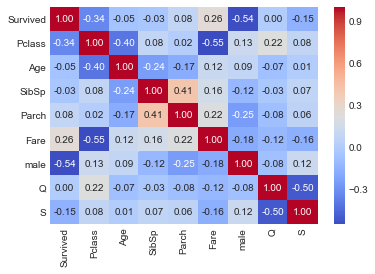

In [8]:
from matplotlib import cm

# correlation matrix
sns.heatmap(titanic_dmy.corr(),cmap=cm.coolwarm,annot=True, fmt=".2f")  

From the correlation matrix, We note that passenger "Pclass" and ticket "Fare" features are correlated (correlation factor $> 0.5 $). Thus, we could keep only one of them. we will keep "Pclass" and remove "Fare" feature since it is less expressive.

We note also that, "Survived" and "male" features are also correlated. This means that "male" feature could give high intuition about if the passenger had "Survived".

In [9]:
# correlated variable "Fare"
titanic_dmy=titanic_dmy.drop(['Fare'],axis=1)

# Visualize final dataset
print("\nInformation about the final dataset:")
titanic_dmy.info()

titanic_dmy.head()


Information about the final dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 44.3 KB


,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


<font color="Green"><u>_**Observations:**_</u></font>
- The obtained data after cleaning and processing has 889 passenger logs, 7 features ("Survived", "Pclass", "Age", "SibSp", "Parch", "male", "Q" and "S") and one target "Survived".
- Q, S columns are dummies variables that represent the "Embarked" port feature. This feature has 3 value (C: Cherbourg, Q: Queenstown, S: Southampton). When "Q" and "S" dummies are set to "0" this imply that the port of embarkation is "C: Cherbourg". 

### Train logistic classifier and predict
<font color="blue">**Question 5: **</font>
- Use "[fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)" function to train the logistic model "Logistic_Regr"
- Use "[predict](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict)" function to predict if passengers (X array) is survived or not.
- calculate the accuracy (number of good prediction/number of all passengers) of the logistic model.

In [18]:
# extract feature and target columns
X = titanic_dmy.iloc[:,1:8].values
y = titanic_dmy.iloc[:,0].values

# train logistic classifier
Logistic_Regr = LogisticRegression()
Logistic_Regr.fit(X, y)

# predict survavibality
y_pred = Logistic_Regr.predict(X)

# calculate accuracy
accuracy = (y_pred==y).sum()/y.shape[0]    # you can also use:  Logistic_Regr.score(X,y)
print("The accuracy of our logistic classifier is: ", accuracy)


The accuracy of our logistic classifier is:  0.805399325084


0.8053993250843644

<font color="Green"><u>_**Observations:**_</u></font>
- As for linear model, we could use "fit" and "predict" function to train and use the logistic classifier.
- The accuracy is the ratio between number of right classified samples and total number of samples. It may inform us how well the classifier prediction will be. In general, this is not true. When, the data is skewed and majority of samples are negative (y=0) even a naive classifier that predict always y=0 will have high accuracy. However, this does not means the classifier will predict well the class of new sample.